# KPOP GROUP CLASSIFIER


# Problem statement
This projects aims to classiffy K-POP songs from BLACKPINK, TWICE and DREAMACTHER. According to the dataset features such as dancabilty energy and tembo.
# Data Collection
Dataset Source - Data gotten from the Spotify API using synthetic features
Data consists of 17 columns and 150 rows

### 1. Import Important packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [16]:
df = pd.read_csv('../data/raw/raw_data.csv')
df.head()

,track_name,artist,album,release_date,popularity,duration_ms,explicit,track_id,danceability,energy,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness
0,"TAKEDOWN (JEONGYEON, JIHYO, CHAEYOUNG)",TWICE,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,91,181192,False,1rKQjUhF9zFJmuUotr3VkV,0.749671,0.786174,0.964769,143.230299,-4.734153,0.140366,0.486905,0.047898,0.047665
1,Strategy,TWICE,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,87,168645,False,6Q3lFQgpvhA9VApFKLFZtZ,0.547612,0.709198,0.758770,142.656488,-4.725776,0.287058,0.094776,0.324487,0.089232
2,THIS IS FOR,TWICE,THIS IS FOR,2025-07-11,83,131097,False,3598iBWrS4JhJqP5tHlpVK,0.698650,0.694229,0.982254,115.791564,-4.291136,0.023671,0.523357,0.269160,0.054279
3,Strategy (feat. Megan Thee Stallion),TWICE,STRATEGY,2024-12-06,77,201760,False,5zQUndaoBtXJ10SsApqtvw,0.713443,0.732308,0.961168,138.309995,-3.568720,0.104808,0.207734,0.103212,0.013136
4,Strategy (from the Netflix film KPop Demon Hun...,TWICE,STRATEGY,2024-12-06,78,166773,False,22fSzde77hjB052Vo155LF,0.736140,0.953804,0.896417,143.646437,-7.119745,0.404479,0.485917,0.049693,0.032368


### Data shape

In [18]:
df.shape

(150, 17)

# Dataset information
- track_name
- artist
- album
- release_date
- popularity
- duration_ms
- explicit
- track_id
- dancabilty
- energy
- valance
- tempo
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness

# 3) Data checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [19]:
#Missing values
df.isnull().sum()

track_name          0
artist              0
album               0
release_date        0
popularity          0
duration_ms         0
explicit            0
track_id            0
danceability        0
energy              0
valence             0
tempo               0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

### Data has no duplicates in it

In [23]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        150 non-null    object 
 1   artist            150 non-null    object 
 2   album             150 non-null    object 
 3   release_date      150 non-null    object 
 4   popularity        150 non-null    int64  
 5   duration_ms       150 non-null    int64  
 6   explicit          150 non-null    bool   
 7   track_id          150 non-null    object 
 8   danceability      150 non-null    float64
 9   energy            150 non-null    float64
 10  valence           150 non-null    float64
 11  tempo             150 non-null    float64
 12  loudness          150 non-null    float64
 13  speechiness       150 non-null    float64
 14  acousticness      150 non-null    float64
 15  instrumentalness  150 non-null    float64
 16  liveness          150 non-null    float64
dt

In [25]:
# Check number of unique Values of each column
df.nunique()

track_name          127
artist                3
album                56
release_date         56
popularity           44
duration_ms         128
explicit              2
track_id            150
danceability        149
energy              136
valence             143
tempo               150
loudness            150
speechiness         150
acousticness        150
instrumentalness    150
liveness            150
dtype: int64

In [26]:
# check data statistics
df.describe()

,popularity,duration_ms,danceability,energy,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,59.073333,189100.646667,0.693381,0.851605,0.696288,133.986921,-4.078783,0.198804,0.301321,0.088534,0.098469
std,13.404445,28037.064732,0.134216,0.104959,0.174608,10.649362,1.128828,0.125487,0.159398,0.076134,0.087065
min,38.000000,105800.000000,0.344163,0.549724,0.351372,101.031134,-7.159351,0.018280,0.014682,0.000255,0.000114
25%,48.000000,175889.000000,0.596812,0.774912,0.542004,127.210767,-4.706531,0.104671,0.186771,0.027331,0.034150
50%,58.500000,191040.000000,0.693013,0.866508,0.682654,133.898020,-3.984687,0.181555,0.281290,0.067608,0.070485
75%,70.000000,208699.750000,0.785136,0.938522,0.827617,141.826005,-3.320921,0.272579,0.389444,0.127478,0.143615
max,93.000000,251933.000000,1.000000,1.000000,1.000000,161.052024,-1.389864,0.578322,0.774999,0.327559,0.392878


# 4) Exploring the data

In [40]:
df.head(5)

,track_name,artist,album,release_date,popularity,duration_ms,explicit,track_id,danceability,energy,valence,tempo,loudness,speechiness,acousticness,instrumentalness,liveness
0,"TAKEDOWN (JEONGYEON, JIHYO, CHAEYOUNG)",TWICE,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,91,181192,False,1rKQjUhF9zFJmuUotr3VkV,0.749671,0.786174,0.964769,143.230299,-4.734153,0.140366,0.486905,0.047898,0.047665
1,Strategy,TWICE,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,87,168645,False,6Q3lFQgpvhA9VApFKLFZtZ,0.547612,0.709198,0.758770,142.656488,-4.725776,0.287058,0.094776,0.324487,0.089232
2,THIS IS FOR,TWICE,THIS IS FOR,2025-07-11,83,131097,False,3598iBWrS4JhJqP5tHlpVK,0.698650,0.694229,0.982254,115.791564,-4.291136,0.023671,0.523357,0.269160,0.054279
3,Strategy (feat. Megan Thee Stallion),TWICE,STRATEGY,2024-12-06,77,201760,False,5zQUndaoBtXJ10SsApqtvw,0.713443,0.732308,0.961168,138.309995,-3.568720,0.104808,0.207734,0.103212,0.013136
4,Strategy (from the Netflix film KPop Demon Hun...,TWICE,STRATEGY,2024-12-06,78,166773,False,22fSzde77hjB052Vo155LF,0.736140,0.953804,0.896417,143.646437,-7.119745,0.404479,0.485917,0.049693,0.032368


In [94]:
# What are the artists we have
print("What are the artists we have: ",end=" ")
print(df['artist'].unique())
print(" ")


# List of albums
print("How many albums do we have: ", end=" ")
print(df['album'].count(),'Albums')
print(" ")

# What is te most popular group
artist_popularity = df.groupby('artist')['popularity'].mean().reset_index()

print("Most popular artist:",)
most_popular_artist = artist_popularity.loc[artist_popularity['popularity'].idxmax()]
print(f"'{most_popular_artist['artist']}' with a popularity of {most_popular_artist['popularity']:.0f}")
print(" ")


# What is the least popular group
print("Least Popular artist:")
least_popular_artist = artist_popularity.loc[artist_popularity['popularity'].idxmin()]
print(f"'{least_popular_artist['artist']}' with a popularity of {least_popular_artist['popularity']:.0f}")
print(" ")

# Most Popular song
print("Most Popular song:")
most_popular_song = df.loc[df['popularity'].idxmax(), ['track_name', 'artist', 'popularity']]
print(f"'{most_popular_song['track_name']}' by {most_popular_song['artist']} with a popularity of {most_popular_song['popularity']:.0f}")
print(" ")

# Count unique albums per artist
print("Albums per artist:")
albums_per_artist = df.groupby('artist')['album'].nunique()
print(albums_per_artist)
print(" ")

#Albums per artist
print("These are the albums per artist:")
for artist, albums in df.groupby('artist')['album'].unique().items():
    print(f"{artist}:")
    for album in albums:
        print(f"  - {album}")
    print()



What are the artists we have:  ['TWICE' 'BLACKPINK' 'Dreamcatcher']
 
How many albums do we have:  150 Albums
 
Most popular artist:
'TWICE' with a popularity of 66
 
Least Popular artist:
'Dreamcatcher' with a popularity of 45
 
Most Popular song:
'JUMP' by BLACKPINK with a popularity of 93
 
Albums per artist:
artist
BLACKPINK       19
Dreamcatcher    19
TWICE           18
Name: album, dtype: int64
 
These are the albums per artist:
BLACKPINK:
  - JUMP
  - THE ALBUM
  - KILL THIS LOVE
  - BORN PINK
  - SQUARE UP
  - SQUARE ONE
  - As If It's Your Last
  - Dua Lipa (Complete Edition)
  - SQUARE TWO
  - Pink Venom
  - Ice Cream (with Selena Gomez)
  - THE GIRLS (BLACKPINK THE GAME OST)
  - Chromatica
  - Sour Candy (with BLACKPINK)
  - BLACKPINK IN YOUR AREA (Japanese Version)
  - BLACKPINK ARENA TOUR 2018 "SPECIAL FINAL IN KYOCERA DOME OSAKA"
  - Dawn Of Chromatica
  - BLACKPINK 2018 TOUR 'IN YOUR AREA' SEOUL (Live)
  - DDU-DU DDU-DU

Dreamcatcher:
  - [Dystopia : Lose Myself]
  - 1st

# 5) Data visualization


Below is code for the popularity distribution visualization. the purpose is to compare the average popularity across artists and show the distribution of popularity scores.

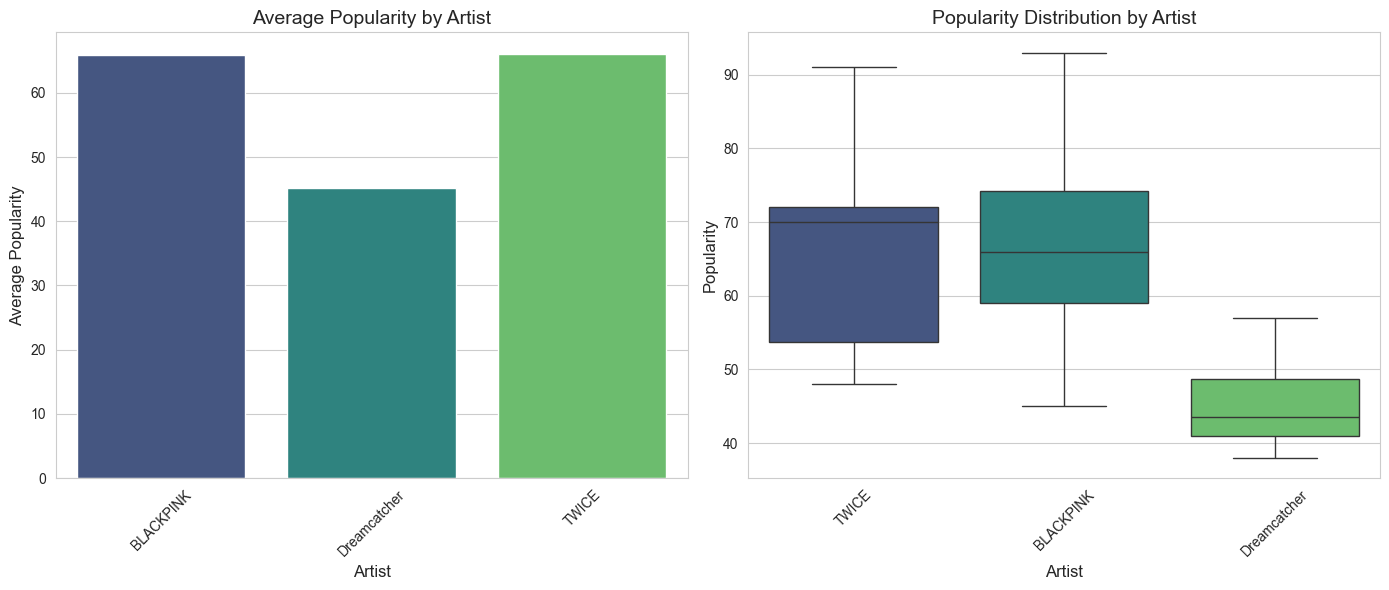

In [81]:
# Calculate mean popularity by artist
artist_popularity = df.groupby('artist')['popularity'].mean().reset_index()

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for average popularity by artist
sns.barplot(data=artist_popularity, x='artist', y='popularity', ax=ax1, palette='viridis')
ax1.set_title('Average Popularity by Artist', fontsize=14)
ax1.set_xlabel('Artist', fontsize=12)
ax1.set_ylabel('Average Popularity', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Box plot for popularity distribution by artist
sns.boxplot(data=df, x='artist', y='popularity', ax=ax2, palette='viridis')
ax2.set_title('Popularity Distribution by Artist', fontsize=14)
ax2.set_xlabel('Artist', fontsize=12)
ax2.set_ylabel('Popularity', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Insights from the popularity distribution
- Twice has the largest popularity showing that they have strong market appeal.
- Dreamcatcher has the lowest popularity which can be due to their niche type of music.


The code below is to show the trend of average track popularity over time by release year for each artist.

In [97]:
# Parse release_date to extract year
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Remove rows with invalid years (if any)
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Group by artist and year, calculate mean popularity
trend_data = df.groupby(['artist', 'year'])['popularity'].mean().reset_index()

# Create line plot with Plotly
fig = px.line(
    trend_data,
    x='year',
    y='popularity',
    color='artist',
    title='Popularity Trends Over Time by Artist',
    labels={'year': 'Release Year', 'popularity': 'Average Popularity'},
    markers=True
)

# Customize layout
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Average Popularity',
    legend_title='Artist',
    font=dict(size=12),
    xaxis=dict(tickmode='linear', dtick=1),  # Ensure integer years
    showlegend=True
)

# Show the plot
fig.show()

### Below is code that shows the relationship between energy, danceabilty and popularity. 

In [101]:

# Create a subplot with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scene'}, {'type': 'xy'}]],
    subplot_titles=('2D Scatter: Danceability vs Energy by Popularity')
)

# 3D Scatter Plot
scatter_3d = go.Scatter3d(
    x=df['energy'],
    y=df['danceability'],
    z=df['popularity'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['artist'].astype('category').cat.codes,  # Color by artist
        colorscale='Viridis',
        showscale=False,
        opacity=0.8
    ),
    text=df['track_name'] + ' (' + df['artist'] + ')',  # Hover text
    hovertemplate='Track: %{text}<br>Energy: %{x:.2f}<br>Danceability: %{y:.2f}<br>Popularity: %{z}<extra></extra>'
)

# Add 3D scatter to subplot
fig.add_trace(scatter_3d, row=1, col=1)

# Update 3D scene layout
fig.update_scenes(
    dict(
        xaxis_title='Energy',
        yaxis_title='Danceability',
        zaxis_title='Popularity'
    ),
    row=1, col=1
)

# 2D Scatter Plot
scatter_2d = go.Scatter(
    x=df['danceability'],
    y=df['energy'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['popularity'],  # Color by popularity
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Popularity')
    ),
    text=df['track_name'] + ' (' + df['artist'] + ')',  # Hover text
    hovertemplate='Track: %{text}<br>Danceability: %{x:.2f}<br>Energy: %{y:.2f}<br>Popularity: %{marker.color}<extra></extra>'
)

# Add 2D scatter to subplot
fig.add_trace(scatter_2d, row=1, col=2)

# Update 2D layout
fig.update_xaxes(title_text='Danceability', row=1, col=2)
fig.update_yaxes(title_text='Energy', row=1, col=2)

# Update overall layout
fig.update_layout(
    title='Energy, Danceability, and Popularity Analysis',
    font=dict(size=12),
    showlegend=False,
    width=1200,
    height=600
)

# Show the plot
fig.show()

- The track with the highest popularity, “JUMP” by BLACKPINK (popularity 93), has danceability of 0.9188 and energy of 1.0, suggesting that extremely high values in these features may contribute to its success. 
- TWICE and BLACKPINK may cluster in the high danceability–energy region, while Dreamcatcher may lean toward high energy but lower danceability, reflecting stylistic differences.
